In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [492]:
filename = 'train.csv'
#filename = 'test.csv'
df = pd.read_csv(filename)
df.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [493]:
df.columns = ['Id', 'ints']
a = df.ix[0].ints.split(',')[-1]

In [494]:
df['ints_list'] = df.ints.apply(lambda x: x.split(','))
df['ints_len'] = df.ints_list.apply(lambda x: len(x))
df['ints_data'] = df.ints_list.apply(lambda x: x[:-1])
df['res'] = df.ints_list.apply(lambda x: x[-1])
print('Longest:', df.ints_len.max())
df.head()

Longest: 348


,Id,ints,ints_list,ints_len,ints_data,res
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352...","[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...","[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...","[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099...","[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217
4,13,"1,111,12211,1343211,147753211,16252853211,1787...","[1, 111, 12211, 1343211, 147753211, 1625285321...",12,"[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211


Indices: [ 67485 109971  25786  92199    638 111286  73967  80791  92469  42542
  85362  79960  14750  62679   1142  67325]


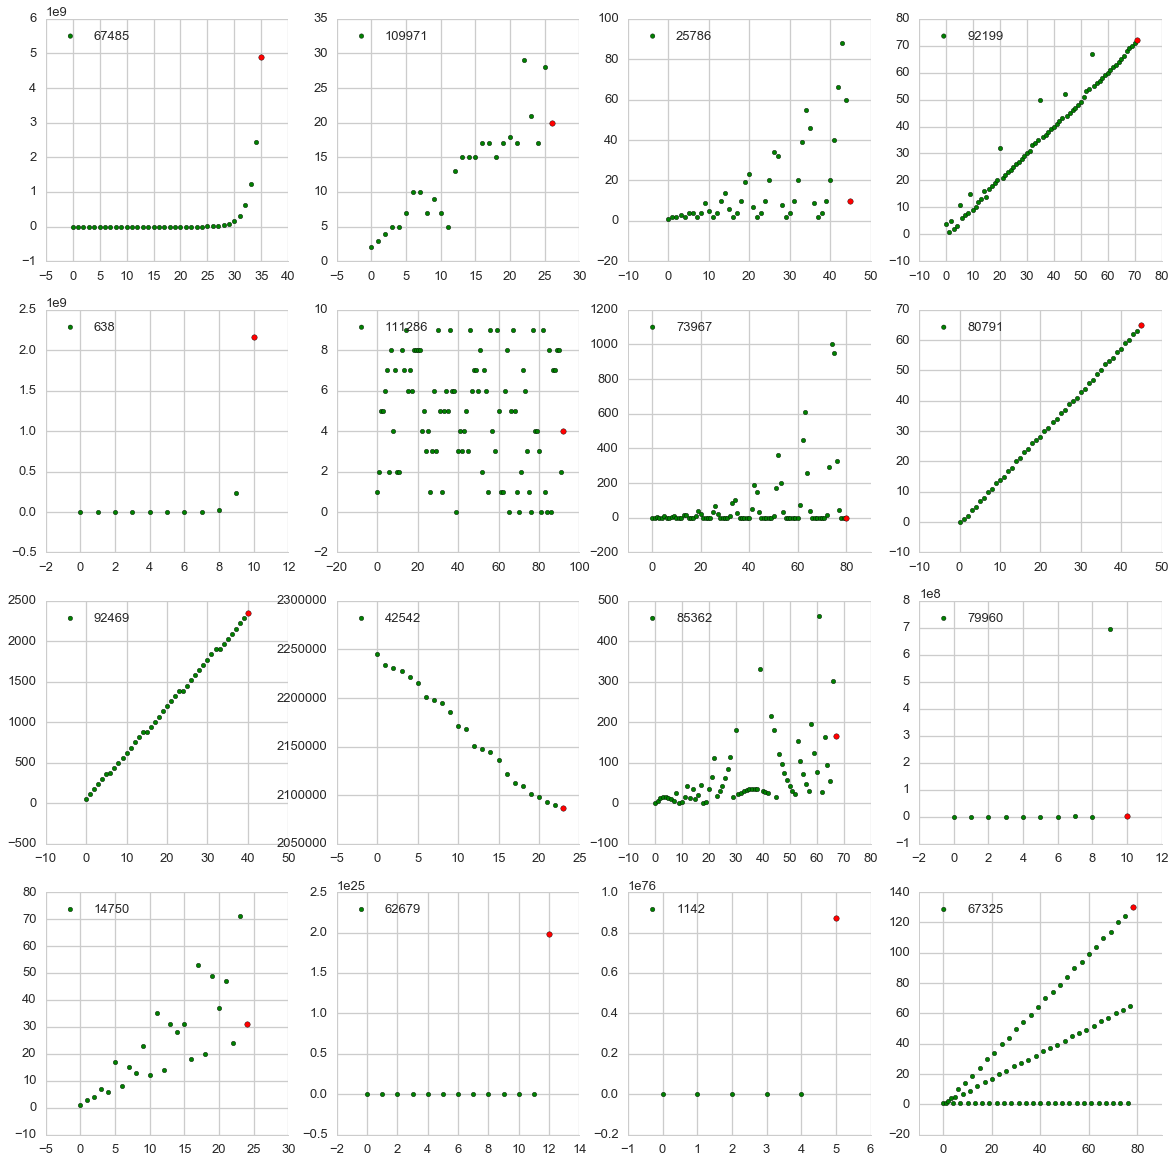

In [529]:
df.ints_len.max()
nrows, ncols = 4, 4
ar = np.random.randint(low=0, high=len(df.index), size=nrows*ncols)
print('Indices:', ar)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
sns.set(style='whitegrid', context='talk')
#for i in range(nrows * ncols):
cnt = 0
for i in ar:    
    row = df.ix[i]
    x = np.arange(row.ints_len)
    y = row.ints_data
    res = row.res
    plt.subplot(nrows, ncols, cnt + 1)
    plt.scatter(x[:-1], y, c='g', label=str(i))
    plt.scatter(x[-1], res, c='r', s=30)
    plt.legend(loc='upper left')
    cnt += 1
sns.despine()

In [539]:
df1 = df.iloc[42542]
df_train = pd.DataFrame()
df_train['x'] = np.arange(df1.ints_len)
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['x5'] = df_train.x ** 5
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x).astype(float)
df_train['x0'] = 1
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x).astype(float)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)
df_train['tan'] = np.tan(df_train.x)
df_train['res'] = df1.ints_list
df_train['prev'] = df_train.res.shift(1)
df_train = df_train[['x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'tan', 'prev', 'res']]
df_train.head(20)

,x0,x,x2,x3,x4,x5,sqrt,odd,exp,log,sin,cos,tan,prev,res
0,1,0,0,0,0,0,0.000000,0,1.000000e+00,-inf,0.000000,1.000000,0.000000,NaN,2245543
1,1,1,1,1,1,1,1.000000,1,2.718282e+00,0.000000,0.841471,0.540302,1.557408,2245543,2233571
2,1,2,4,8,16,32,1.414214,0,7.389056e+00,0.693147,0.909297,-0.416147,-2.185040,2233571,2230583
3,1,3,9,27,81,243,1.732051,1,2.008554e+01,1.098612,0.141120,-0.989992,-0.142547,2230583,2227597
4,1,4,16,64,256,1024,2.000000,0,5.459815e+01,1.386294,-0.756802,-0.653644,1.157821,2227597,2221631
5,1,5,25,125,625,3125,2.236068,1,1.484132e+02,1.609438,-0.958924,0.283662,-3.380515,2221631,2215673
6,1,6,36,216,1296,7776,2.449490,0,4.034288e+02,1.791759,-0.279415,0.960170,-0.291006,2215673,2200813
7,1,7,49,343,2401,16807,2.645751,1,1.096633e+03,1.945910,0.656987,0.753902,0.871448,2200813,2197847
8,1,8,64,512,4096,32768,2.828427,0,2.980958e+03,2.079442,0.989358,-0.145500,-6.799711,2197847,2194883
9,1,9,81,729,6561,59049,3.000000,1,8.103084e+03,2.197225,0.412118,-0.911130,-0.452316,2194883,2186003


In [540]:
cols = [col for col in df_train.columns if col != 'res']
print(cols)

['x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'tan', 'prev']


In [541]:
df_train.replace(np.inf, np.nan, inplace=True)
df_train.replace(-np.inf, np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train = df_train.reset_index()

In [542]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
X_train = df_train[cols]
y_train = df_train.res
X_test = df_train[cols]
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
df_train['predict'] = pred

In [543]:
from sklearn import cross_validation
import warnings
#kf = cross_validation.KFold(len(X_train.index), n_folds=5, shuffle=True)
alphas = [10 ** x for x in range(-5, 5)]
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    try:
        lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
        lr_rigdeCV.fit(X_train, y_train)
        best_alpha = lr_rigdeCV.alpha_        
    except: best_alpha = 0.1
    
print('Alpha =', best_alpha)    
lr_ridge = linear_model.Ridge(alpha=best_alpha)
lr_ridge.fit(X_train, y_train)
pred_ridge = lr_ridge.predict(X_test)
df_train['predict_ridge'] = pred_ridge

scores = cross_validation.cross_val_score(lr_ridge, X_train, y_train, cv=15)
print('Cross validation score =', np.mean(scores))

Alpha = 10.0
Cross validation score = -1.09370389766


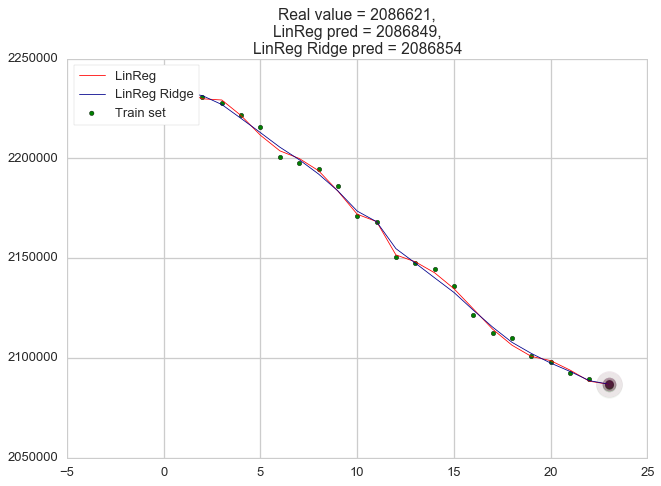

In [544]:
import seaborn as sns
sns.set(style='whitegrid', context='talk')
plt.scatter(df_train[:-1].x, df_train[:-1].res, s=20, c='g', label='Train set')

for j in range(5):    
    plt.scatter(df_train[-1:].x, df_train[-1:].res, s=50+5**j, c='green', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict,  s=50+5**j, c='red', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict_ridge,  s=50+5**j, c='darkblue', alpha=0.52-0.12*j, label='_')
    
plt.plot(df_train.x, df_train.predict, '-', c='r', lw=0.8, ms=5, label='LinReg')
plt.plot(df_train.x, df_train.predict_ridge, '-', c='darkblue', lw=0.8, ms=5, label='LinReg Ridge')
plt.legend(loc='upper left', frameon=True)
#sns.despine()
res = df_train[-1:].res
lr_p = int(np.round(float(df_train[-1:].predict.values[0])))
lrr_p = int(np.round(float(df_train[-1:].predict_ridge.values[0])))
plt.title('Real value = %s,\nLinReg pred = %s,\nLinReg Ridge pred = %s' 
          % (str(df_train[-1:].res.values[0]), str(lr_p), str(lrr_p)))

In [331]:
# Check recursion

def get_matrix(seq, order):
    A = []
    for i in range(order + 1):
        s = [1] + seq[i:i+order]
        A = s if i == 0 else np.vstack([A, s]) 
    b = seq[order:2*order+1]
    return A, b

def check_recursion(seq):
    p = len(seq) - 1
    n = int(p/2 -1)
    try:
        A, b = get_matrix(seq, n)
        if  np.linalg.matrix_rank(A) - 1 < n:
            n = np.linalg.matrix_rank(A) - 1
            A, b = get_matrix(seq, n)
        w = np.linalg.solve(A, b)    
        # check
        feat_check_A = [1] + seq[n+1:2*n+1]
        feat_check_b = seq[2*n+1]
        if np.dot(feat_check_A, w) == feat_check_b:        
            feat_pred_A = [1] + seq[p-n+1:]
            predict = np.dot(feat_pred_A, w)
            return int(predict)
        else: return None        
    except:
        return None

In [351]:
from sklearn import linear_model 
from sklearn import cross_validation
import time
preds = []
longest = df.ints_len.max()
#cnt = 200
cnt = len(df.index)

df_train = pd.DataFrame()
df_train['x'] = np.arange(longest)
df_train['x0'] = 1
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x)
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)

alphas = [10 ** x for x in range(-4, 4)]
#nrows, ncols = 4, 4
#cnt = nrows * ncols
#fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,18))
#sns.set(style='whitegrid', context='notebook')

st = time.time()
df['recursion'] = df.ints_list.apply(lambda x: check_recursion(list(map(int, x))))
print('Recursions checked. Time elapsed: %.2f min' % ((time.time() - st) / 60))

st = time.time()
for i in range(cnt):
    if (i % 1000 == 0) & (i != 0):
        print('Sequences: %d of %d, time elapsed: %.2f min, total estimated time: %.2f min' 
              % (i, cnt, (time.time() - st) / 60, (time.time() - st) * cnt / (60 * i)))        
    #print(i)
    df1 = df.ix[i]
    df_curr = df_train[:df1.ints_len].copy(deep=True)    
    df_curr['res'] = df1.ints_list
    df_curr['prev'] = df_curr.res.shift(1)    
    df_curr = df_curr[['x0', 'x', 'x2', 'x3', 'x4', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'prev', 'res']]

    cols = [col for col in df_curr.columns if col != 'res']    
    df_curr = df_curr[1:].reset_index()
    
    if not df_curr.empty:    
        X_train = df_curr[cols]
        y_train = df_curr.res
        X_test = df_curr[cols]
        
        lr = linear_model.LinearRegression()        
        lr.fit(X_train, y_train)        
        pred = lr.predict(X_test)
        df_curr['predict'] = pred        
        #preds.append(df_curr[-1:].predict)
        
        with warnings.catch_warnings():
            warnings.simplefilter("error")            
            try:
                lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
                lr_rigdeCV.fit(X_train, y_train)
                best_alpha = lr_rigdeCV.alpha_
            except: best_alpha = 0.1
            
            try:
                lr_ridge = linear_model.Ridge(alpha=best_alpha)
                lr_ridge.fit(X_train, y_train)
                pred_ridge = lr_ridge.predict(X_test)
            except: pred_ridge = pred

        df_curr['predict_ridge'] = pred_ridge
        preds.append(df_curr[-1:].predict_ridge.values[0])        
        
    else:
        preds.append(df1.ints_list[-1])
    
    #plt.subplot(nrows, ncols, i + 1)
    #plt.scatter(df_curr[:-1].x, df_curr[:-1].res, s=20, c='g', label='Train set ' + str(i))

    #for j in range(5):    
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].res, s=50+5**j, c='green', alpha=0.52-0.12*j, label='_')
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].predict,  s=50+5**j, c='red', alpha=0.52-0.12*j, label='_')
    #    plt.scatter(df_curr[-1:].x, df_curr[-1:].predict_ridge,  s=50+5**j, c='darkblue', alpha=0.52-0.12*j, label='_')

    #plt.plot(df_curr.x, df_curr.predict, '-', c='r', lw=0.8, ms=5, label='LinReg')
    #plt.plot(df_curr.x, df_curr.predict_ridge, '-', c='darkblue', lw=0.8, ms=5, label='LinReg Ridge')
    #plt.legend(loc='upper left', frameon=True)    
    
print(len(df.index), len(preds))
print('Time %.2f sec' % (time.time() - st))
print('Estimated time for full test data: %.2f min' % ((time.time() - st) * int(len(df.index)) / (60 * int(len(preds)))))
df['preds'] = preds

Recursions checked. Time elapsed: 1.27 min
Sequences: 1000 of 113845, time elapsed: 0.24 min, total estimated time: 27.25 min
Sequences: 2000 of 113845, time elapsed: 0.53 min, total estimated time: 29.94 min
Sequences: 3000 of 113845, time elapsed: 0.85 min, total estimated time: 32.39 min
Sequences: 4000 of 113845, time elapsed: 1.08 min, total estimated time: 30.80 min
Sequences: 5000 of 113845, time elapsed: 1.32 min, total estimated time: 30.02 min
Sequences: 6000 of 113845, time elapsed: 1.56 min, total estimated time: 29.66 min
Sequences: 7000 of 113845, time elapsed: 1.77 min, total estimated time: 28.71 min
Sequences: 8000 of 113845, time elapsed: 2.03 min, total estimated time: 28.95 min
Sequences: 9000 of 113845, time elapsed: 2.25 min, total estimated time: 28.48 min
Sequences: 10000 of 113845, time elapsed: 2.47 min, total estimated time: 28.07 min
Sequences: 11000 of 113845, time elapsed: 2.74 min, total estimated time: 28.33 min
Sequences: 12000 of 113845, time elapsed: 

In [361]:
df['Last'] = df.recursion
df.Last.fillna(df.preds, inplace=True)
df['Last'] = df['Last'].apply(lambda x: int(np.round(float(x))))
print(df[['Id', 'Last']].head(10))
df[['Id', 'Last']].to_csv('submission.csv', sep=',', index=False)

   Id                        Last
0   1                587020672973
1   2                725161963867
2   4                         158
3   5                         402
4   6                          23
5   9                        1430
6  10            1589719078594515
7  12      7564280948067895607296
8  14  10576607846652308357120000
9  17      2795903765047156408320
